# Python Data Analysis - Web Scrapping Project

For my PDA project, I scraped the goodRx website to get the top 20 drugs for each letter of the alphabet. I scraped price information by pharmacy and different fill options by their lowest prices. Below are the steps that I took to process and analyze my data.

- **Step 1**: Import necessary packages
- **Step 2**: Load and preview data
- **Step 3**: Examine features 
- **Step 4**: Inspect data
- **Step 5**: Clean data
- **Step 6**: Gather descriptive statistics
- **Step 7**: Visualize Data
- **Step 8**: Correct any skewedness
- **Step 9**: Analyze questions

## Step 1: Import the necessary packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
import seaborn as sns

## Step 2: Load and preview the data

In [2]:
df_1 = pd.read_csv('./goodrx_part1/goodrx_part1.csv')

In [3]:
# preview data
df_1

,club,coupon_type,alternative,form,freecoupons,price_generic,info_name,mailorder,name,pharmacy,price,retail
0,5.23,with free Coupon,Olanzapine,tablet,9.00,generic,Olanzapine,4.50,Zyprexa,Ralphs,11.25,119.0
1,5.23,with free Discount,Olanzapine,tablet,9.00,generic,Olanzapine,4.50,Zyprexa,CVS Pharmacy,80.20,301.0
2,5.23,with free Coupon,Olanzapine,tablet,9.00,generic,Olanzapine,4.50,Zyprexa,Albertsons (Sav-on),12.47,127.0
3,5.23,with free Coupon,Olanzapine,tablet,9.00,generic,Olanzapine,4.50,Zyprexa,Walgreens,93.56,316.0
4,5.23,with free Coupon,Olanzapine,tablet,9.00,generic,Olanzapine,4.50,Zyprexa,Rite Aid,15.00,317.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4587,7.20,with free Coupon,Duoneb,vial,12.88,generic,Duoneb,21.75,Ipratropium Albuterol,Rite Aid,24.07,73.0
4588,7.20,with free Coupon,Duoneb,vial,12.88,generic,Duoneb,21.75,Ipratropium Albuterol,Target (CVS),17.80,53.0
4589,7.20,with free Coupon,Duoneb,vial,12.88,generic,Duoneb,21.75,Ipratropium Albuterol,Ralphs,14.17,40.0
4590,7.20,with free Discount,Duoneb,vial,12.88,generic,Duoneb,21.75,Ipratropium Albuterol,Vons Pharmacy,12.92,51.0


In [4]:
print(df_1.shape)

(4592, 12)


## Step 3: Examine Features

In [5]:
print(df_1.columns)

Index(['club', 'coupon_type', 'alternative', 'form', 'freecoupons',
       'price_generic', 'info_name', 'mailorder', 'name', 'pharmacy', 'price',
       'retail'],
      dtype='object')


### Description of each feature:

#### df_1:
- **club**: lowest price option as a member of GoodRx Gold
- **coupon_type**: what the "coupon" represents
- **alternative**: alternative prescription drug that are equivalent (brand/generic)
- **form**: how the drug is contained (ie. pill, capsule, bottle etc.) 
- **freecoupons**: lowest price option using the free coupons
- **price_generic**: what the prices are based on, generic or brand
- **mailorder**: lowest price option for mailorder
- **name**: the name of the prescription
- **pharmacy**: the selected pharmacy 
- **price**: the price from selected pharmacy
- **retail**: the price of the retail option

## Step 4: Inspect Data

In [6]:
# find out the data types for each feature
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4592 entries, 0 to 4591
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   club           4273 non-null   float64
 1   coupon_type    4592 non-null   object 
 2   alternative    4254 non-null   object 
 3   form           4592 non-null   object 
 4   freecoupons    4592 non-null   float64
 5   price_generic  4592 non-null   object 
 6   info_name      4513 non-null   object 
 7   mailorder      3893 non-null   float64
 8   name           4592 non-null   object 
 9   pharmacy       4592 non-null   object 
 10  price          4592 non-null   float64
 11  retail         4237 non-null   float64
dtypes: float64(5), object(7)
memory usage: 430.6+ KB


In [7]:
df_1.describe()

,club,freecoupons,mailorder,price,retail
count,4273.000000,4592.000000,3893.000000,4592.000000,4237.000000
mean,85.145514,87.604366,888.589211,104.389993,200.568799
std,345.123437,321.464765,11081.915681,339.633243,513.955453
min,1.830000,0.130000,1.500000,0.130000,5.000000
25%,4.250000,6.750000,7.100000,11.887500,33.000000
50%,9.490000,13.170000,15.000000,20.565000,78.000000
75%,28.920000,28.795000,49.560000,46.850000,185.000000
max,5307.460000,5048.520000,155040.000000,5382.130000,10615.000000


In [8]:
np.sum(df_1.isnull())

club             319
coupon_type        0
alternative      338
form               0
freecoupons        0
price_generic      0
info_name         79
mailorder        699
name               0
pharmacy           0
price              0
retail           355
dtype: int64

## Step 5: Clean the data

### (a) Fill in retail prices when null

- Its okay that **club** and **mailorder** have null values since that indicates there was no option for these. 
- However, when the **retail** price is missing, we aren't able to calculate the % savings. 
- In order to get around this, we will impute the retail price based on the average retail prices of that drug from the other pharmacies.
- Examine null retail values to see if they are discount cards or the price is the retail price

In [9]:
df_1[df_1.retail.isna()].coupon_type.value_counts()

retail price          176
with free Discount     98
with free Coupon       81
Name: coupon_type, dtype: int64

#### When `retail` is null and `coupon_type = retail price`, then set the **retail** equal to it's **price** 

In [10]:
# find where retail is na and coupon type is retail price, then set retail = price
retail_mask = (df_1.retail.isna()) & (df_1.coupon_type=='retail price')
df_1['retail'] = df_1['retail'].fillna(df_1[retail_mask].price)

In [11]:
# check that null values are gone from 'retail price' coupon type
df_1[df_1.retail.isna()].coupon_type.value_counts()

with free Discount    98
with free Coupon      81
Name: coupon_type, dtype: int64

In [12]:
df_1.shape

(4592, 12)

#### Impute retail price based on retail price of other pharamcies from the same drug
- When `retail` is null and `coupon_type = with free discount or with free coupon`, then set the **retail** equal to the max price of the drug's retail amout

#### Some drugs are all null for the retail prices, so remove those since theres no other way to get retail price

In [13]:
# find drugs where there is no retail at all and remove them from pricing1 df, create copy df
all_null = df_1.groupby('name').sum('retail')['retail']==0
null_drugs = all_null[all_null].index

null_mask = df_1.name.isin(null_drugs) # boolean mask of drugs with all null for retail
df_1 = df_1[~null_mask] # remove drugs with all null for retail
null_drugs # drugs removed

Index(['Freestyle Libre', 'Introvale', 'Kalexate', 'Quflora', 'Utopic',
       'Vivotif', 'Ximino', 'Yosprala'],
      dtype='object', name='name')

In [14]:
df_1.shape

(4513, 12)

#### Now impute retail price based on other pharmacies

In [15]:
# create copy
df1 = df_1.copy() 
# create dictionary with max retail price by drug  
retail_dict = df_1[['name','retail']].groupby('name').max('retail').to_dict()
null_idx = df1['retail'].isna() # null index
# set imputed values to df
df1.loc[null_idx, 'retail'] = df1[null_idx].apply(lambda x: retail_dict['retail'][x['name']], axis=1)

In [16]:
# check to see if there are any na in retail
df1.isna().sum()

club             310
coupon_type        0
alternative      289
form               0
freecoupons        0
price_generic      0
info_name         60
mailorder        669
name               0
pharmacy           0
price              0
retail             0
dtype: int64

### (c) Create % savings from price and retail

In [17]:
def get_savings (df, discount_col, retail_col):
    df['%_savings'] = -1*(df[discount_col]/df[retail_col]-1)
    return df

In [18]:
# create a % savings column to see the magnitude 
get_savings(df1, 'price', 'retail').head()

,club,coupon_type,alternative,form,freecoupons,price_generic,info_name,mailorder,name,pharmacy,price,retail,%_savings
0,5.23,with free Coupon,Olanzapine,tablet,9.0,generic,Olanzapine,4.5,Zyprexa,Ralphs,11.25,119.0,0.905462
1,5.23,with free Discount,Olanzapine,tablet,9.0,generic,Olanzapine,4.5,Zyprexa,CVS Pharmacy,80.20,301.0,0.733555
2,5.23,with free Coupon,Olanzapine,tablet,9.0,generic,Olanzapine,4.5,Zyprexa,Albertsons (Sav-on),12.47,127.0,0.901811
3,5.23,with free Coupon,Olanzapine,tablet,9.0,generic,Olanzapine,4.5,Zyprexa,Walgreens,93.56,316.0,0.703924
4,5.23,with free Coupon,Olanzapine,tablet,9.0,generic,Olanzapine,4.5,Zyprexa,Rite Aid,15.00,317.0,0.952681


In [19]:
df1.describe()

,club,freecoupons,mailorder,price,retail,%_savings
count,4203.000000,4513.000000,3844.000000,4513.000000,4513.000000,4513.000000
mean,79.549888,83.648112,893.725676,99.594545,194.315956,0.566475
std,341.678618,320.112667,11152.162311,337.209592,500.351388,0.276510
min,1.830000,0.130000,1.500000,0.130000,2.940000,-0.027273
25%,4.250000,6.700000,7.010000,11.780000,30.000000,0.373810
50%,9.390000,12.880000,14.770000,20.010000,75.000000,0.644522
75%,28.170000,27.750000,48.230000,45.290000,179.000000,0.783818
max,5307.460000,5048.520000,155040.000000,5382.130000,10615.000000,0.993415


### (d) Split df1 dataframe into df for pharmacy/drug and df for fill method
1. Create columns to label drugs for the type of fill methods available, either: drugs with free only, with free/mail only, with free/club only and with all three

In [20]:
# new df for filling methods bc they are not specific by pharmacy
drop1 = ['price', 'retail','%_savings', 'pharmacy']
filldf = df1.drop(drop1, axis=1).copy()
group = ['name','form', 'price_generic']
filldf = filldf.groupby(group).mean().reset_index()

# drop unwanted columns from original df
drop2 = ['club', 'freecoupons','mailorder']
df1 = df1.drop(drop2, axis=1)

In [21]:
# mask where club and mail are null
club_na = filldf['club'].isna()
mail_na = filldf['mailorder'].isna()

# create shell column for fill method
filldf['fill_options'] = 0
# name fill method by type
filldf.loc[(club_na & mail_na),'fill_options'] = 'free_only'
filldf.loc[(club_na & ~mail_na),'fill_options'] = 'no_club'
filldf.loc[(~club_na & mail_na),'fill_options'] = 'no_mail'
filldf.loc[(~club_na & ~mail_na),'fill_options'] = 'all'

In [22]:
filldf

,name,form,price_generic,club,freecoupons,mailorder,fill_options
0,Acetaminophen Codeine,tablet,generic,5.38,10.65,27.00,all
1,Acyclovir,tablet,generic,3.00,6.45,3.13,all
2,Albuterol,hfa inhaler,generic,20.69,14.05,66.00,all
3,Allopurinol,tablet,generic,3.00,0.84,2.40,all
4,Alprazolam,tablet,generic,2.54,6.63,6.30,all
...,...,...,...,...,...,...,...
449,Zovia,package,generic,20.45,23.62,NaN,no_mail
450,Zubsolv,sublingual tablet,brand,290.51,282.42,NaN,no_mail
451,Zylet,eye dropper,brand,302.29,293.62,355.00,all
452,Zyprexa,tablet,generic,5.23,9.00,4.50,all


2. Collapse freecoupons, mail and club prices into one price column and another column indicating the fill method

In [23]:
# separate club df
ccols = filldf.columns[:4].to_list()
ccols.append('fill_options')
club = filldf.loc[:,ccols]
club = club.rename(columns={'club': 'lowest_price'})

# separate free df
fcols = filldf.columns[:3].to_list()
fcols.extend(('freecoupons','fill_options'))
free = filldf.loc[:,fcols]
free = free.rename(columns={'freecoupons': 'lowest_price'})

# separate mail df
mcols = filldf.columns[:3].to_list()
mcols.extend(('mailorder','fill_options'))
mail = filldf.loc[:,mcols]
mail = mail.rename(columns={'mailorder': 'lowest_price'})

In [24]:
# combine df's and create labels for fill type
stack = pd.concat([club,free,mail], axis=0)
labels = pd.concat([pd.Series(['club']*454),pd.Series(['mail']*454),
                    pd.Series(['free']*454)], axis=0)

In [25]:
# combine df and labeles
filldf = pd.concat([stack, labels], axis=1)
filldf = filldf.rename(columns={0: 'fill_type'})

In [26]:
# there is one drug that is abnormally high with a mail order price of $155,040 
filldf.describe()

,lowest_price
count,1262.000000
mean,329.054065
std,6174.025174
min,0.130000
25%,6.000000
50%,12.685000
75%,31.607500
max,155040.000000


### (e) Updating error in outliar

In [27]:
filldf.groupby(['name', 'fill_type']).mean().sort_values(by='lowest_price', ascending=False)\
.head()

lowest_price
name        fill_type              
Xeljanz Xr  free          155040.00
Xeljanz     free          155040.00
Xeljanz Xr  club            5307.46
            mail            5048.52
Zafirlukast free            2880.00

In [28]:
# however from clicking into the mailorder link the price is actually $5,168
# set mail order to $5,168
x_mail = filldf['name'].str.startswith('Xeljanz') & (filldf['fill_type']=='mail')
idx = filldf.loc[x_mail].index.to_list()
filldf.at[idx[0],'lowest_price'] = 5158
filldf.at[idx[1],'lowest_price'] = 5158

In [29]:
# check that it's updated
filldf[x_mail]

,name,form,price_generic,lowest_price,fill_options,fill_type
415,Xeljanz,tablet,brand,5158.0,all,mail
416,Xeljanz Xr,tablet,brand,5158.0,all,mail


## Step 6: Understanding distributions

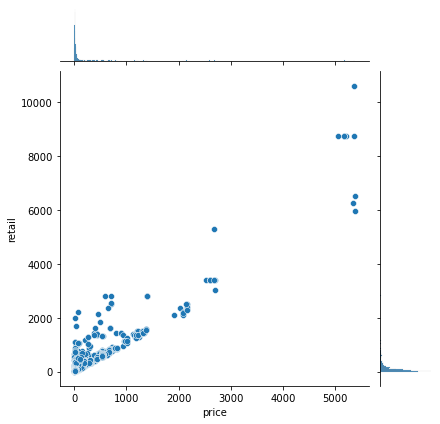

In [30]:
sns.jointplot(x = df1['price'], y = df1['retail'], palette='husl')

### Distributions are highly skewed due to few but very large drug prices. log transform prices

In [31]:
filldf['log_lowest'] = filldf[['lowest_price']].apply(lambda x: np.log(x))
filldf = filldf[filldf['log_lowest'] > 0]

In [32]:
# distribution is heavily skewed right due to few extremely high drug price - log transform
log = df1[['price','retail']].apply(lambda x: np.log(x))
df1['log_price'] = log['price']
df1['log_retail'] = log['retail']
# remove negative logs
df1 = df1[(df1['log_retail']>0) & (df1['log_price']>0)]

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'retail'}>],
       [<AxesSubplot:title={'center':'log_price'}>,
        <AxesSubplot:title={'center':'log_retail'}>]], dtype=object)

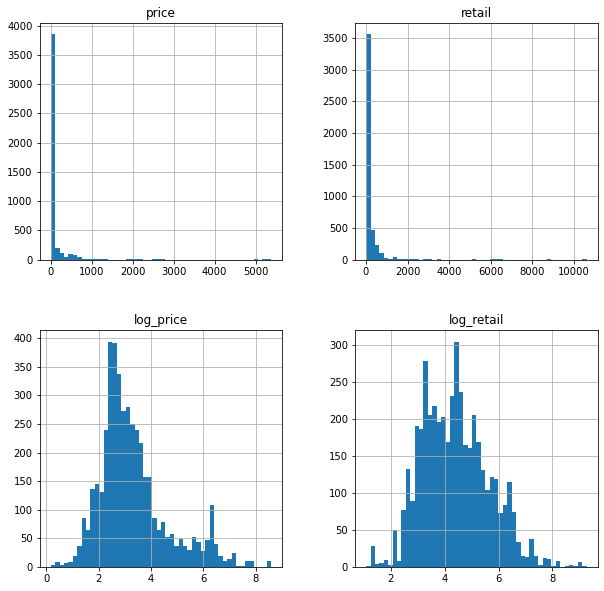

In [33]:
df1[['price','retail', 'log_price', 'log_retail']].hist(figsize=(10,10), bins=50, layout=(2,2))

<AxesSubplot:xlabel='log_price', ylabel='Count'>

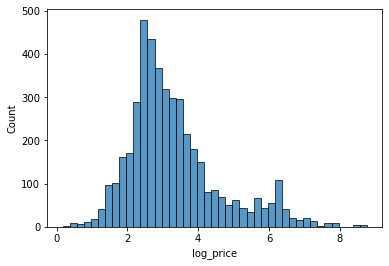

In [34]:
sns.histplot(data=df1, x="log_price", binwidth=.2)

<AxesSubplot:xlabel='log_retail', ylabel='Count'>

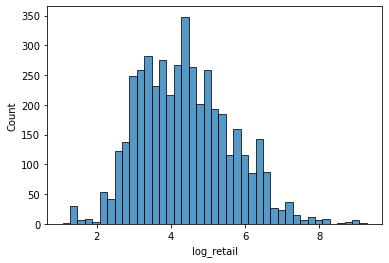

In [35]:
sns.histplot(data=df1, x="log_retail", binwidth=.2)

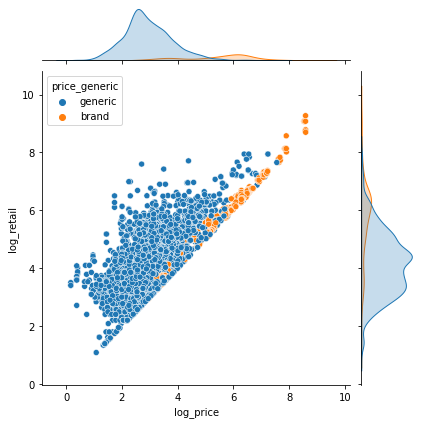

In [36]:
sns.jointplot(data=df1, x="log_price", y="log_retail", hue="price_generic")

## (1) Which Pharmacy Has Best Prices?
- by % discount
- by lowest retail price
- by lowest price

In [37]:
# set boxplot colors by pharmacy to be consistent
my_pal = {"Albertsons (Sav-on)":"tomato", "Costco":"orange", "CVS Pharmacy":"yellow", 
          "Ralphs":"turquoise", "Rite Aid":"springgreen", "Safeway":"deepskyblue",
          "Safeway":"royalblue", "Target (CVS)":"mediumpurple","Walmart":"hotpink", 
          "Vons Pharmacy":"mediumorchid", "Walgreens":"greenyellow"}

### Average of % savings (Bar)

Text(0.5, 1.0, 'Average % Savings per Medication')

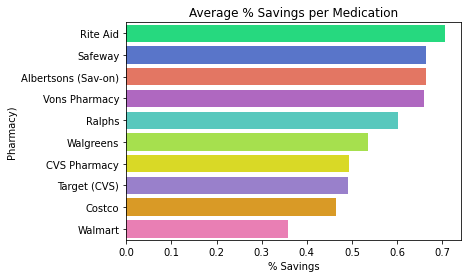

In [38]:
# get average % savings by pharmacy (not weighted by magnitude of price)
savings1 = df1.groupby('pharmacy')[['%_savings']].mean().reset_index()
savings1 = savings1.sort_values('%_savings',ascending=False)
ax = sns.barplot(x="%_savings", y="pharmacy", data=savings1, palette=my_pal, saturation=.7, orient='h')
ax.set_xlabel("% Savings")
ax.set_ylabel("Pharmacy)")
ax.set_title("Average % Savings per Medication")

### Calculate % saving from total price and retail by pharmacy (bar)

Text(0.5, 1.0, 'Aggregated % Savings by Total Price')

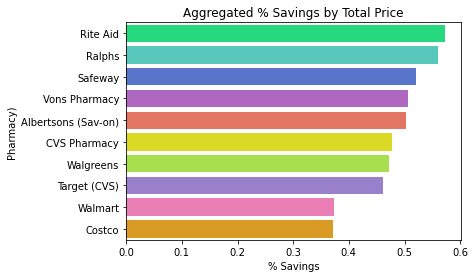

In [39]:
# get average savings by aggregating total price over total retail by pharmacy
savings2 = df1.groupby('pharmacy')[['retail','price', 'log_retail','log_price']].sum()
get_savings(savings2, 'price', 'retail')
savings2 = savings2.sort_values('%_savings', ascending=False).reset_index()
ax = sns.barplot(x="%_savings", y="pharmacy", data=savings2, palette=my_pal, saturation=.7,orient='h')
ax.set_xlabel("% Savings")
ax.set_ylabel("Pharmacy)")
ax.set_title("Aggregated % Savings by Total Price")

###  Log Prices vs % Savings (Scatter)

Text(0.5, 1.0, 'Log of Prices vs % Savings')

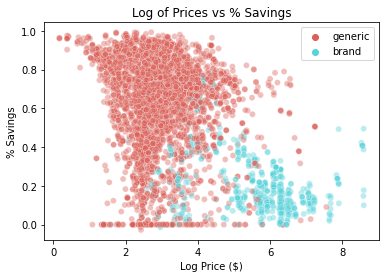

In [40]:
s = sns.scatterplot(data=df1, x="log_price", y="%_savings",hue="price_generic", alpha=0.4, palette="hls")
s.set_ylabel("% Savings")
s.set_xlabel("Log Price ($)")
s.legend(title=None)
plt.title("Log of Prices vs % Savings")

### % Savings  by Pharmacy (Boxplot)

Text(0.5, 1.0, '% Savings by Pharmacy')

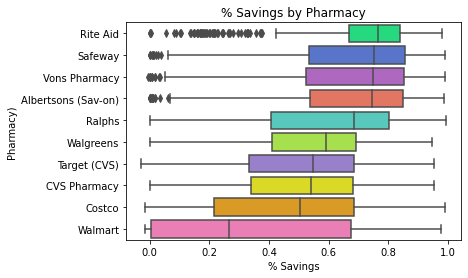

In [41]:
order = df1.groupby('pharmacy').median().sort_values(by='%_savings', ascending=False).index.values
ax = sns.boxplot(x='%_savings', y='pharmacy', data=df1, saturation=.7,
                 palette=my_pal, orient="h", order=order)
ax.set_xlabel("% Savings")
ax.set_ylabel("Pharmacy)")
ax.set_title("% Savings by Pharmacy")

### Log Price by Pharmacy (Boxplot)

Text(0.5, 1.0, 'Log of Medication Prices by Pharmacy')

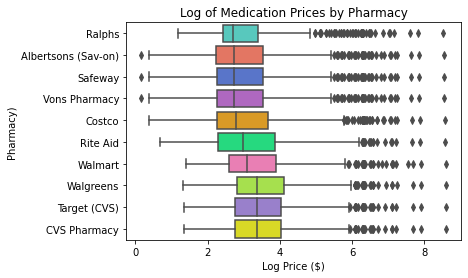

In [42]:
order = df1.groupby('pharmacy').median().sort_values(by='log_price').index.values
ax = sns.boxplot(x='log_price', y='pharmacy', data=df1, saturation=.7,
                 palette=my_pal, orient="h", order=order)
ax.set_xlabel("Log Price ($)")
ax.set_ylabel("Pharmacy)")
ax.set_title("Log of Medication Prices by Pharmacy")

### Log Retail 

Text(0.5, 1.0, 'Log of Retail Medications Prices by Pharmacy')

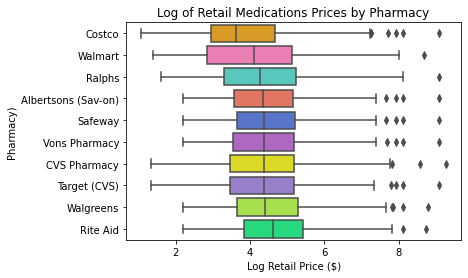

In [43]:
order = df1.groupby('pharmacy').median().sort_values(by='log_retail').index.values
ax = sns.boxplot(x='log_retail', y='pharmacy', data=df1, saturation=.7,
                 palette=my_pal, orient="h", order=order)
ax.set_xlabel("Log Retail Price ($)")
ax.set_ylabel("Pharmacy)")
ax.set_title("Log of Retail Medications Prices by Pharmacy")

### Prices: < 50

Text(0.5, 1.0, 'Medications Prices by Pharmacy \n (Less Than $50)')

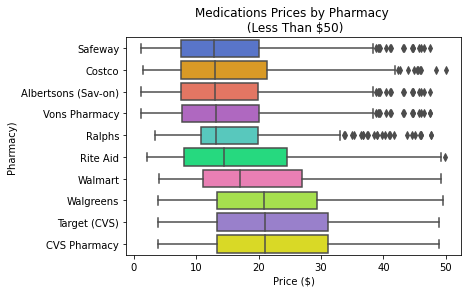

In [44]:
d = df1[df1['price']<50]
order = d.groupby('pharmacy').median().sort_values(by='price').index.values
ax = sns.boxplot(x='price', y='pharmacy', data=d, saturation=.7,
            palette=my_pal, orient="h", order=order)
ax.set_xlabel("Price ($)")
ax.set_ylabel("Pharmacy)")
ax.set_title("Medications Prices by Pharmacy \n (Less Than $50)")

### Prices: 50 - 100

Text(0.5, 1.0, 'Medications Prices by Pharmacy \n (Between \\$50 and \\$99)')

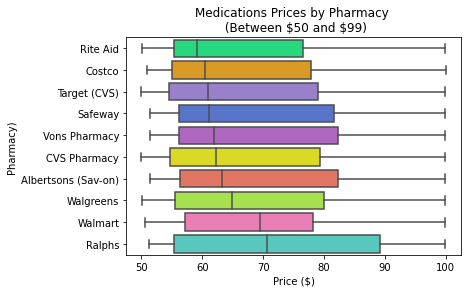

In [45]:
d = df1[(df1['price']<100) & (df1['price']>49.999)]
order = d.groupby('pharmacy').median().sort_values(by='price').index.values
ax = sns.boxplot(x='price', y='pharmacy', data=d, saturation=.7,
            palette=my_pal, orient="h", order=order)
ax.set_xlabel("Price ($)")
ax.set_ylabel("Pharmacy)")
ax.set_title("Medications Prices by Pharmacy \n (Between \$50 and \$99)")

### Prices: 100 - 500

Text(0.5, 1.0, 'Medications Prices by Pharmacy \n (Between \\$100 and \\$499)')

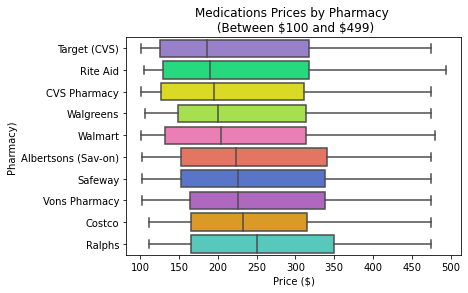

In [46]:
d = df1[(df1['price']<500) & (df1['price']>99.999)]
order = d.groupby('pharmacy').median().sort_values(by='price').index.values
ax = sns.boxplot(x='price', y='pharmacy', data=d, saturation=.7,
            palette=my_pal, orient="h", order=order)
ax.set_xlabel("Price ($)")
ax.set_ylabel("Pharmacy)")
ax.set_title("Medications Prices by Pharmacy \n (Between \$100 and \$499)")

### Prices: 500 - 1000

Text(0.5, 1.0, 'Medications Prices by Pharmacy \n (Between \\$500 and \\$999)')

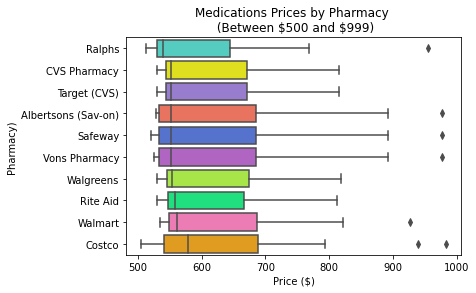

In [47]:
d = df1[(df1['price']<1000) & (df1['price']>499.999)]
order = d.groupby('pharmacy').median().sort_values(by='price').index.values
ax = sns.boxplot(x='price', y='pharmacy', data=d, 
            palette=my_pal, orient="h", order=order)
ax.set_xlabel("Price ($)")
ax.set_ylabel("Pharmacy)")
ax.set_title("Medications Prices by Pharmacy \n (Between \$500 and \$999)")

### Prices: <1000

Text(0.5, 1.0, 'Medications Prices by Pharmacy \n ($1,000 and Over)')

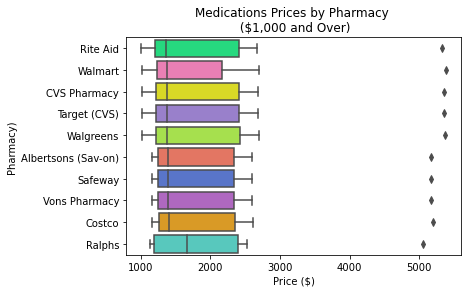

In [48]:
d = df1[df1['price']>999.999]
order = d.groupby('pharmacy').median().sort_values(by='price').index.values
ax = sns.boxplot(x='price', y='pharmacy', data=d, saturation=.7,
            palette=my_pal, orient="h", order=order)
ax.set_xlabel("Price ($)")
ax.set_ylabel("Pharmacy)")
ax.set_title("Medications Prices by Pharmacy \n ($1,000 and Over)")

### Most Expensive Drugs by Pharmacy

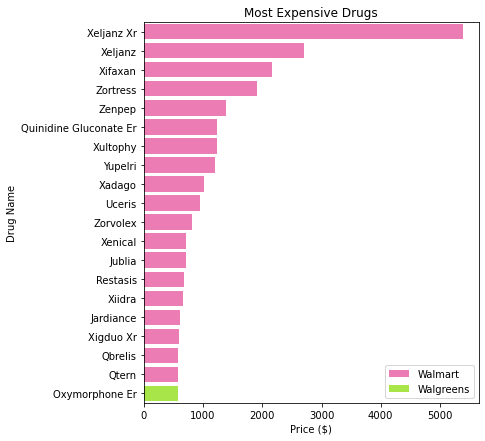

In [49]:
top = df1.groupby(['name']).max().reset_index().sort_values(by='price',ascending=False).head(20)
ax=sns.barplot(x="price", y="name", data=top, hue='pharmacy',palette=my_pal, orient='h', dodge=False)
ax.set_xlabel("Price ($)")
ax.set_ylabel("Drug Name")
ax.set_title("Most Expensive Drugs")
ax.legend(title=None, loc='best')
plt.gcf().set_size_inches(6, 7)

### Least Expensive Drugs by Pharmacy

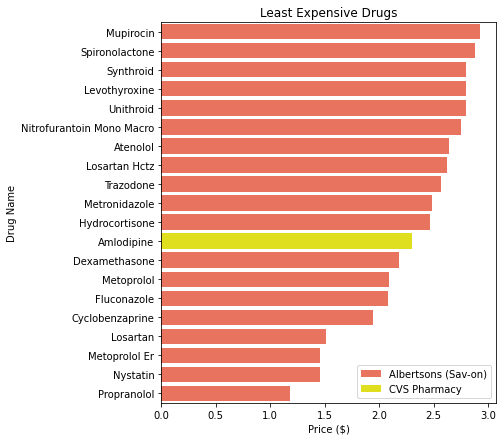

In [50]:
btm = df1.groupby(['name']).min().reset_index().sort_values(by='price',ascending=False).tail(20)
ax=sns.barplot(x="price", y="name", data=btm, hue='pharmacy',palette=my_pal, orient='h', dodge=False)
ax.set_xlabel("Price ($)")
ax.set_ylabel("Drug Name")
ax.set_title("Least Expensive Drugs")
ax.legend(title=None)
plt.gcf().set_size_inches(6, 7)

## (2) Which Fill Method is the Cheapest? 

- Combinations of methods:
    - free only
    - free and mail
    - free and club
    - all three offered 
    
## (3) How Fill Method Price Vary Between Brand vs Generic

### Avg Price by Fill Type (Brand vs Generic)

In [51]:
# color palette dictionary to keep colors consistent 
fill_pal = {'club': "turquoise", 'mail': "lightskyblue", 'free': "mediumslateblue"}

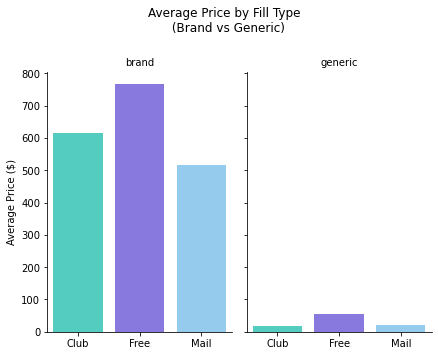

In [52]:
gf = filldf.groupby(['price_generic', 'fill_type']).mean().reset_index()
ax = sns.catplot(x="fill_type", y="lowest_price", col="price_generic",
            data = gf, palette=fill_pal, kind="bar", ci=None, aspect=.6)\
            .set_axis_labels("", "Average Price ($)")\
            .set_xticklabels(["Club", "Free", "Mail"])\
            .set_titles("{col_name}")
ax.fig.suptitle('Average Price by Fill Type \n (Brand vs Generic)')
ax.fig.subplots_adjust(top=.80)

### Counts of the Combinations of Fill Methods by Brand vs Generic

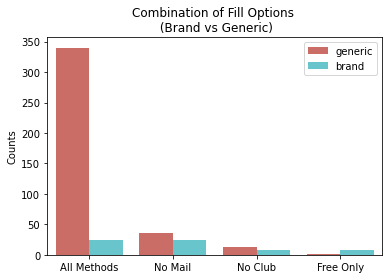

In [53]:
count = filldf.groupby(['name','fill_options','price_generic']).mean().reset_index()
ax = sns.countplot(x="fill_options", data=count, hue='price_generic', palette="hls")
ax.set_xticklabels(["All Methods","No Mail", "No Club", "Free Only"])
ax.set_title("Combination of Fill Options \n (Brand vs Generic)")
ax.set_xlabel(None)
ax.set_ylabel("Counts")
ax.legend(title=None)

### All Fill Types Offered (Brand vs Generic)

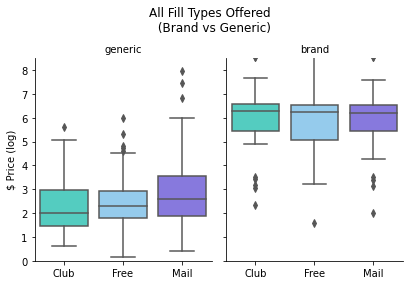

In [54]:
a = filldf[filldf['fill_options']=='all']
order = a.groupby(['fill_type']).median().sort_values(by='log_lowest').index.values
ax = sns.catplot(x="fill_type", y="log_lowest", col="price_generic",data=a,
            palette=fill_pal, order=order,kind="box", height=4, aspect=.7)\
            .set_titles("{col_name}")\
            .set(ylim=(0, 8.5))\
            .set_ylabels("$ Price (log)")\
            .set_xlabels("")\
            .set_xticklabels(["Club","Free","Mail"])
ax.fig.suptitle('All Fill Types Offered \n (Brand vs Generic)')
ax.fig.subplots_adjust(top=.80)

### Only Free and Mail Order Offered (Brand vs Generic)

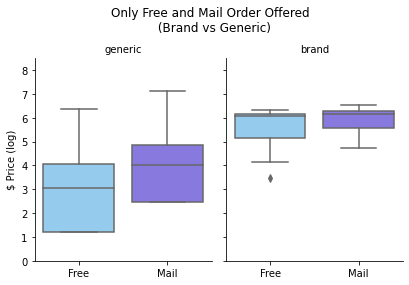

In [55]:
m = filldf[filldf['fill_options']=='no_club']
order = m.groupby(['fill_type']).median().sort_values(by='log_lowest').index.values
ax = sns.catplot(x="fill_type", y="log_lowest", col="price_generic",data=m, 
            palette=fill_pal, order=order, kind="box", height=4, aspect=.7)\
            .set_titles("{col_name}")\
            .set(ylim=(0, 8.5))\
            .set_xticklabels(["Free","Mail"])\
            .set_xlabels("")\
            .set_ylabels("$ Price (log)")
ax.fig.suptitle('Only Free and Mail Order Offered \n (Brand vs Generic)')
ax.fig.subplots_adjust(top=.80)

### Only Free and Club Offered (Brand vs Generic)

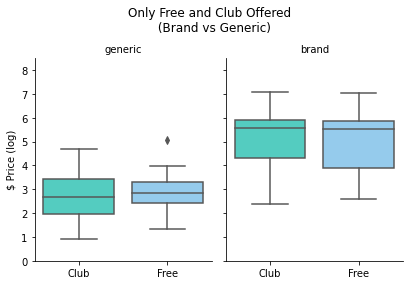

In [56]:
c = filldf[filldf['fill_options']=='no_mail']
ax = sns.catplot(x="fill_type", y="log_lowest", col="price_generic",data=c, 
            palette=fill_pal, kind="box", height=4, aspect=.7)\
            .set_titles("{col_name}")\
            .set(ylim=(0, 8.5))\
            .set_xticklabels(["Club","Free"])\
            .set_xlabels("")\
            .set_ylabels("$ Price (log)")
ax.fig.suptitle('Only Free and Club Offered \n (Brand vs Generic)')
ax.fig.subplots_adjust(top=.80)

### Only Free Offered (Brand vs Generic)

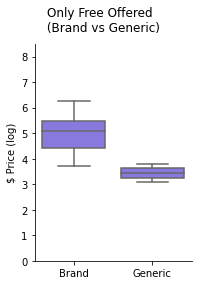

In [57]:
f = filldf[filldf['fill_options']=='free_only']
ax = sns.catplot(x="price_generic", y="log_lowest",data=f, kind="box", 
            palette=(fill_pal['free'],fill_pal['free']), height=4, aspect=.7)\
            .set(ylim=(0, 8.5))\
            .set_xticklabels(["Brand", "Generic"])\
            .set_xlabels("")\
            .set_ylabels("$ Price (log)")
ax.fig.suptitle('Only Free Offered \n (Brand vs Generic)')
ax.fig.subplots_adjust(top=.85)

### Most Expensive Drugs by Price (Brand vs Generic)

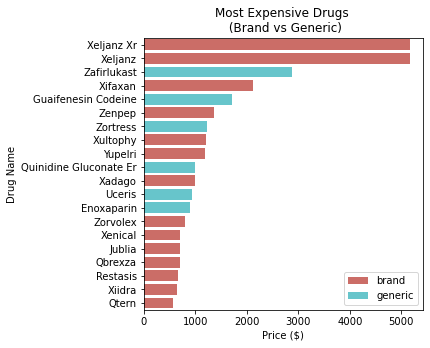

In [58]:
top = filldf.groupby(['name','price_generic']).max()\
            .reset_index().sort_values(by='lowest_price', ascending=False).head(20)
ax=sns.barplot(x="lowest_price", y="name", data=top, hue='price_generic',palette='hls', orient='h', dodge=False)
ax.set_xlabel("Price ($)")
ax.set_ylabel("Drug Name")
ax.set_title("Most Expensive Drugs \n (Brand vs Generic)")
ax.legend(title=None)
plt.gcf().set_size_inches(5, 5)

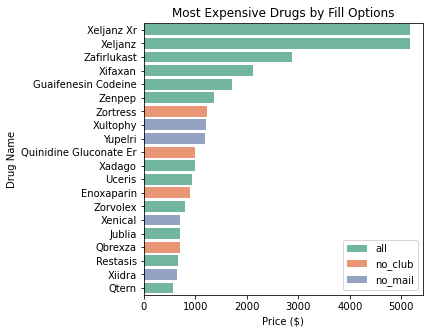

In [59]:
top = filldf.groupby(['name','fill_options']).max()\
            .reset_index().sort_values(by='lowest_price', ascending=False).head(20)
ax=sns.barplot(x="lowest_price", y="name", data=top, hue='fill_options',palette='Set2', orient='h', dodge=False)
ax.set_xlabel("Price ($)")
ax.set_ylabel("Drug Name")
ax.set_title("Most Expensive Drugs by Fill Options")
ax.legend(title=None)
plt.gcf().set_size_inches(5, 5)

### Least Expensive Drugs by Price (Brand vs Generic)

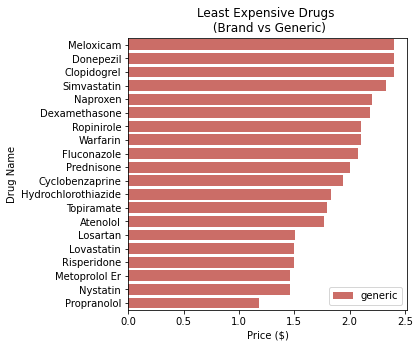

In [60]:
btm = filldf.groupby(['name','price_generic']).min()\
            .reset_index().sort_values(by='lowest_price', ascending=False).tail(20)
ax=sns.barplot(x="lowest_price", y="name", data=btm, hue='price_generic',palette='hls', orient='h', dodge=False)
ax.set_xlabel("Price ($)")
ax.set_ylabel("Drug Name")
ax.set_title("Least Expensive Drugs \n (Brand vs Generic)")
ax.legend(title=None)
plt.gcf().set_size_inches(5, 5)

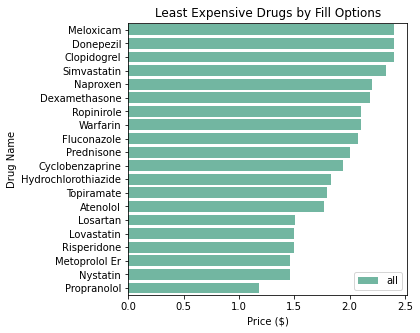

In [61]:
btm = filldf.groupby(['name','fill_options']).min()\
            .reset_index().sort_values(by='lowest_price', ascending=False).tail(20)
ax=sns.barplot(x="lowest_price", y="name", data=btm, hue='fill_options',palette='Set2', orient='h', dodge=False)
ax.set_xlabel("Price ($)")
ax.set_ylabel("Drug Name")
ax.set_title("Least Expensive Drugs by Fill Options")
ax.legend(title=None)
plt.gcf().set_size_inches(5, 5)